# Lasso model selection: AIC-BIC / cross-validation
[原文](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py)

This examples foucues on Lasso $\alpha$ strategy. AIC-BIC, CV

## Dataset


In [1]:
from sklearn.datasets import load_diabetes # 糖尿病
X,y = load_diabetes(return_X_y=True, as_frame=True)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [2]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In addition, we add some random features to better illustrate the model selection

In [3]:
import numpy as np
import pandas as pd

rng = np.random.RandomState(42)
n_random_features = 14
X_ranom = pd.DataFrame(
    rng.randn(X.shape[0], n_random_features),
    columns=[ f"random_{i:02d}" for i in range(n_random_features)] #❓f格式化
)
X = pd.concat([X, X_ranom], axis=1)
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,...,random_04,random_05,random_06,random_07,random_08,random_09,random_10,random_11,random_12,random_13
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,...,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,-0.463418,-0.465730,0.241962,-1.913280
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,...,-0.908024,-1.412304,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,...,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,0.738467,0.171368
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,...,-0.460639,1.057122,0.343618,-1.763040,0.324084,-0.385082,-0.676922,0.611676,1.031000,0.931280
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,...,-0.479174,-0.185659,-1.106335,-1.196207,0.812526,1.356240,-0.072010,1.003533,0.361636,-0.645120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,...,-0.761825,0.210367,1.530335,-0.778095,1.171810,1.498098,-0.816155,-1.455055,0.301961,-0.547408
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,...,1.089905,-0.571184,0.043829,0.955803,-0.484258,-0.045929,-0.016568,0.683325,0.590744,-0.220114
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,...,1.892192,-0.883719,-0.773030,-0.870728,0.724592,0.448485,-0.158538,-0.918019,0.092377,-1.564622
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,...,1.579438,-0.611760,1.135948,-0.153998,-0.161955,0.438413,-0.883999,0.132497,-0.381489,-1.320493


## Selecting Lasso via an information criterion : LassoLarsIC

In [4]:
import time
from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

;❓AIC 和BIC怎么做到产生哪些 alpha??

### AIC

In [5]:
start_time = time.time()
lasso_lars_ic = make_pipeline(
    StandardScaler(),
    LassoLarsIC(criterion='aic')
).fit(X,y)
fit_time = time.time()-start_time
lasso_lars_ic

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassolarsic', LassoLarsIC())])

Stroe the AIC metric for each $\alpha$ value during `fit`

In [6]:
results = pd.DataFrame(
    {
        'alphas': lasso_lars_ic[-1].alphas_,
        'AIC criterion': lasso_lars_ic[-1].criterion_
    }
).set_index('alphas')
alpha_aic = lasso_lars_ic[-1].alpha_
alpha_aic

np.float64(0.5867979213449543)

### bic


In [7]:
lasso_lars_ic.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('lassolarsic', LassoLarsIC())],
 'transform_input': None,
 'verbose': False,
 'standardscaler': StandardScaler(),
 'lassolarsic': LassoLarsIC(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'lassolarsic__copy_X': True,
 'lassolarsic__criterion': 'aic',
 'lassolarsic__eps': np.float64(2.220446049250313e-16),
 'lassolarsic__fit_intercept': True,
 'lassolarsic__max_iter': 500,
 'lassolarsic__noise_variance': None,
 'lassolarsic__positive': False,
 'lassolarsic__precompute': 'auto',
 'lassolarsic__verbose': False}

In [8]:
lasso_lars_ic.set_params( # 不需要重新定义， 设置参数
    lassolarsic__criterion='bic'
).fit(X,y)
results['BIC criterion'] = lasso_lars_ic[-1].criterion_
alpha_bic = lasso_lars_ic[-1].alpha_
alpha_bic

np.float64(4.306012427239533)

we compare AIC/BIC in this df by highlight the min

In [9]:
def highlight_min(x):
    x_min = x.min()
    return  ["font-weight: bold" if v == x_min else "" for v in x]
results.style.apply(highlight_min)

,AIC criterion,BIC criterion
alphas,,
45.160030,5244.764779,5244.764779
42.300343,5208.250639,5212.341949
21.542052,4928.018900,4936.201520
15.034077,4869.678359,4881.952289
6.189631,4815.437362,4831.802601
5.329616,4810.423641,4830.880191
4.306012,4803.573491,4828.121351
4.124225,4804.126502,4832.765671
3.820705,4803.621645,4836.352124


📊 AIC : best $\alpha$ = 0.58;  
BIC : best $\alpha$ = 4.3

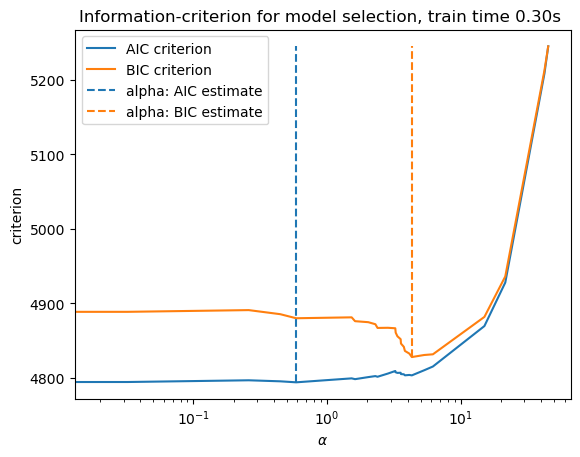

In [10]:
ax = results.plot()
ax.set_xlabel(r"$\alpha$") #❓
ax.set_ylabel('criterion')
ax.set_xscale('log') # log化X尺度
ax.set_title(
    f"Information-criterion for model selection, train time {fit_time:.2f}s "
)
ax.vlines(
    alpha_aic, # 垂直线X坐标，  最优alpha
    results["AIC criterion"].min(), # y起始
    results["AIC criterion"].max(), # y结束
    label="alpha: AIC estimate", # 设置标签，自动图例
    linestyles="--",
    color="tab:blue",
)
ax.vlines(
    alpha_bic, # 垂直线X坐标，  最优alpha
    results["BIC criterion"].min(), # y起始
    results["BIC criterion"].max(), # y结束
    label="alpha: BIC estimate", # 设置标签，自动图例
    linestyles="--",
    color="tab:orange",
)
ax.legend()

## Selecting Lasso via cross-validation
 Lasso estimator can be implemented with different solvers: coordinate descent and least angle regression. 

 分别对应于 LassoCV 和 LassoLarsCV

### Lasso via coordinate descent

In [13]:
from sklearn.linear_model import LassoCV
start_time = time.time()
model = make_pipeline(
    StandardScaler(),
    LassoCV(cv=20)
).fit(X,y)
fit_time = time.time() - start_time


In [33]:
# (n_alphas, n_folds) 表示对应每个元素表示对应 α 和 fold 下的（MSE）。
model[-1].mse_path_.shape  

(531, 20)

(2000.0, 5000.0)

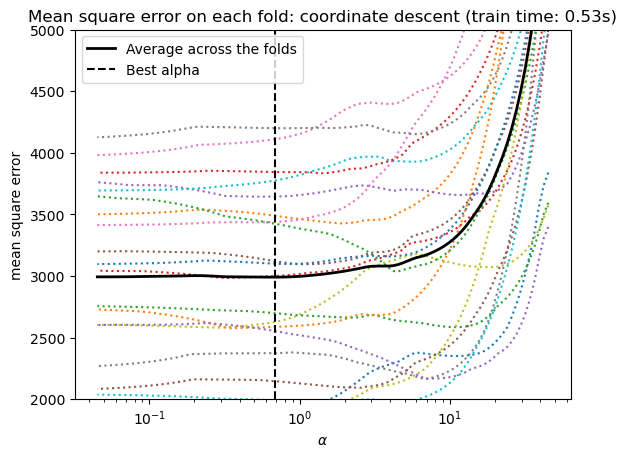

In [23]:
import matplotlib.pyplot as plt

lasso_cv = model[-1]
plt.semilogx(lasso_cv.alphas_, lasso_cv.mse_path_, linestyle=":") # 对X轴进行log变换，y保持线性
plt.plot(
    lasso_cv.alphas_,
    lasso_cv.mse_path_.mean(axis=-1), # 按行平均
    color='black',
    label='Average across the folds',
    linewidth=2
)
plt.axvline(lasso_cv.alpha_, linestyle='--', color='black', label='Best alpha')
plt.xlabel(r"$\alpha$")
plt.ylabel("mean square error")
plt.legend()
plt.title(
    f"Mean square error on each fold: coordinate descent (train time: {fit_time:.2f}s)"
)
plt.ylim(2000,5000)

### Lasso via least angle regression

In [29]:
from sklearn.linear_model import LassoLarsCV

start_time = time.time()
model = make_pipeline(StandardScaler(), LassoLarsCV(cv=20)).fit(X, y)
fit_time = time.time() - start_time

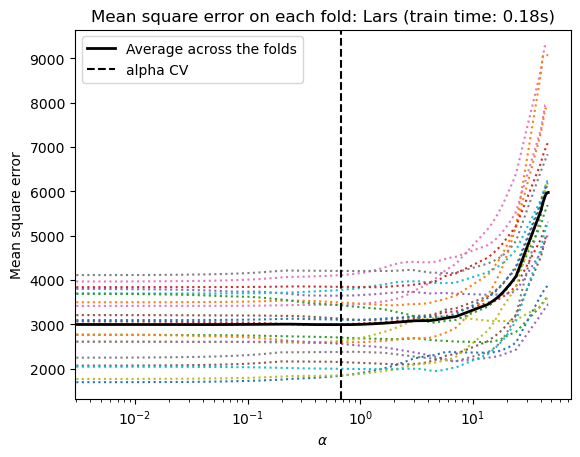

In [32]:
lasso = model[-1]
plt.semilogx(lasso.cv_alphas_, lasso.mse_path_, ":")
plt.semilogx(
    lasso.cv_alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha CV")

plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
_ = plt.title(f"Mean square error on each fold: Lars (train time: {fit_time:.2f}s)")

In [34]:
print(lasso_cv.alpha_, lasso_lars_cv.alpha_)

0.6730881232920619 0.6730881232920619
